## Perfume Data Data Set

Dataset available at https://archive.ics.uci.edu/ml/datasets/Perfume+Data

#### Abstract:
    This data consists of odors of 20 different perfumes. Data was obtained by using a handheld odor meter (OMX-GR sensor) per second for 28 seconds period.

#### Data Set Information:

    The data set gathered when we were working at project for Bahrain university between 2002 and 2003.


#### Attribute Information:

    The data was obtained from 20 different perfumes by using a handheld odor meter(OMX-GR sensor). Names of these perfumes are: ajayeb, ajmal, amreaj, aood, asgar_ali, bukhoor, burberry, dehenalaod, junaid, kausar, rose, solidmusk, TeaTreeOil, raspberry, RoseMusk, strawberry, constrected2, carolina_herrera, oudh_ma'alattar, constrected1. Each column represent a measurement and there were 28 takes (one each second)






### Classification Task

This notebook demonstrates how a machine learning model can determine the type of perfume based on the odometer reading. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 97
np.random.seed(seed)
%matplotlib inline

Reading the data

In [2]:
data = pd.read_excel('data/perfume_data.xlsx', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,ajayeb,64558,64556,64543,64543,64541,64543,64543,64541,64541,...,64541,64541,64541,64541,64541,64541,64528,64528,64528,64528
1,ajmal,60502,60489,61485,60487,61485,61513,60515,60500,60500,...,60472,60472,60461,61470,60487,60487,61485,60487,60472,60472
2,amreaj,57040,57040,57040,58041,58041,58041,58041,57042,57042,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,58041
3,aood,71083,72087,71091,71095,71099,72103,71099,72099,72099,...,72095,71095,71095,72103,71103,71103,71103,72103,72103,72098
4,asgar_ali,68209,68209,68216,68216,68223,68223,68223,68223,68230,...,68230,67224,67217,67217,68223,68223,68223,68223,68223,68230


Renaming the '0' column to 'perfume'

In [4]:
data['perfume'] = data[0]
data = data.drop(0, axis = 1)

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,perfume
0,64558,64556,64543,64543,64541,64543,64543,64541,64541,64541,...,64541,64541,64541,64541,64541,64528,64528,64528,64528,ajayeb
1,60502,60489,61485,60487,61485,61513,60515,60500,60500,60487,...,60472,60461,61470,60487,60487,61485,60487,60472,60472,ajmal
2,57040,57040,57040,58041,58041,58041,58041,57042,57042,58043,...,58041,58041,58041,58041,58041,58041,58041,58041,58041,amreaj
3,71083,72087,71091,71095,71099,72103,71099,72099,72099,73098,...,71095,71095,72103,71103,71103,71103,72103,72103,72098,aood
4,68209,68209,68216,68216,68223,68223,68223,68223,68230,68230,...,67224,67217,67217,68223,68223,68223,68223,68223,68230,asgar_ali


In [6]:
data.shape

(20, 29)

In [7]:
perfumes = list(data.iloc[:,-1])

In [8]:
perfumes

['ajayeb',
 'ajmal',
 'amreaj',
 'aood',
 'asgar_ali',
 'bukhoor',
 'burberrry',
 'dehenalaod',
 'junaid',
 'kausar',
 'rose',
 'solidmusk',
 'TeaTreeOil',
 'raspberry',
 'RoseMusk',
 'strawberry',
 'constrected2',
 'carolina_herrera',
 "oudh_ma'alattar",
 'constrected']

#### As each row in the data frame consists of 28 Odometer measurement values and the corresponding name of the Perfume. This form has to be converted into a form which has each observation as a row and each attribute as column.

For this a new Dataframe is created and the values are appended correspondingly

In [9]:
df = pd.DataFrame([], columns = ['Observation', 'Perfume'])
df

,Observation,Perfume


In [10]:
observations = np.array([])
labels = np.array([])

for perfume in range(len(perfumes)):
    for i in range(27):
        obs, label = data.iloc[perfume,i], data.iloc[perfume,-1]
        observations = np.append(observations, obs)
        labels = np.append(labels, label)

In [11]:
observations = pd.Series(observations)
labels = pd.Series(labels)

In [12]:
df.Observation = observations
df.Perfume = labels

In [13]:
df.head()

,Observation,Perfume
0,64558.0,ajayeb
1,64556.0,ajayeb
2,64543.0,ajayeb
3,64543.0,ajayeb
4,64541.0,ajayeb


#### Shuffling the dataset

In [14]:
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [15]:
df.head()

,Observation,Perfume
0,62999.0,rose
1,68223.0,asgar_ali
2,73585.0,kausar
3,62999.0,rose
4,60528.0,ajmal


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 2 columns):
Observation    540 non-null float64
Perfume        540 non-null object
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


In [17]:
df.groupby('Perfume').mean()

,Observation
Perfume,
RoseMusk,85056.000000
TeaTreeOil,82428.111111
ajayeb,64465.111111
ajmal,60790.148148
amreaj,57819.148148
aood,71800.074074
asgar_ali,68111.740741
bukhoor,70269.111111
burberrry,60462.185185


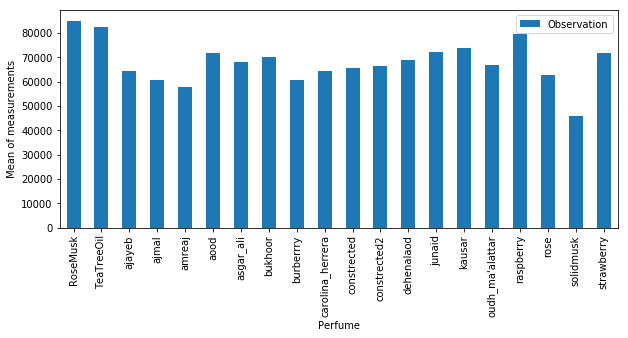

In [18]:
df.groupby('Perfume').mean().plot(kind='bar', figsize=(10,4))
plt.ylabel('Mean of measurements')
plt.show()

#### Encoding the labels into numericals

In [19]:
le = LabelEncoder()

df['Label'] = le.fit_transform(df.Perfume)

In [20]:
X = df.Observation.to_numpy().reshape(-1, 1)
y = df.Label

Splitting into Training and Test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

#### Building Model and making Predictions

##### Decision Tree Classifier

In [22]:
dtc = DecisionTreeClassifier(random_state=seed)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('Accuracy Score - ',  accuracy_score(y_test, y_pred))
print('\nConfusion matrix -\n', confusion_matrix(y_test, y_pred))

Accuracy Score -  1.0

Confusion matrix -
 [[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  


##### Random Forest Classifier

In [23]:
rc = RandomForestClassifier(n_estimators=200 ,random_state=seed)

rc.fit(X_train, y_train)

y_pred = rc.predict(X_test)

print('Accuracy Score - ',  accuracy_score(y_test, y_pred))
print('\nConfusion matrix -\n', confusion_matrix(y_test, y_pred))

Accuracy Score -  0.9938271604938271

Confusion matrix -
 [[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  

#### Decision Tree Classifier is the best choice for this task